In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

from DataCollection import mapPoints
from neuron.neuron import runNeuronCustom, LIF, izhikevich

In [18]:
map = mapPoints('6_Blob')    
map.faltuTime = 1
pointmap = map.pointMap(1) # Dataset number

  0%|          | 0/17 [00:00<?, ?it/s]Generating X-Y-Z-V-T map for :  6_Blob | Iteration Number:  1...
24it [02:08,  5.33s/it]                        


In [19]:
for key in pointmap.keys():
    for j in range(len(pointmap[key])):
        pointmap[key][j] = np.array(pointmap[key][j])
    pointmap[key] = np.array(pointmap[key])

In [26]:
def stackPlot(pointmap, col):
    figure, axis = plt.subplots(4, 4)

    for i in range(16):
        for j in range(2,3):
            # print(type(pointmap[str(i+1)][j]))
            axis[i//4, i%4].plot(np.abs(pointmap[str(i+1)][j][:,col]*20 - 2.44*19 - 2.5)+1)
            axis[i//4, i%4].plot(pointmap[str(i+1)][j][:,col-1])

            axis[i//4, i%4].set_title('Sensor: '+str(i+1))
            axis[i//4, i%4].grid()
    figure.tight_layout(pad=0.1)
    plt.show()


def Plot3DALL():
    ax = plt.axes(projection ='3d')
    for i in range(1,17):
        X = pointmap[str(i)][:,0]
        Y = pointmap[str(i)][:,1]
        # Z = pointmap[str(i)][:,2]
        ax.plot3D(X, Y, Z,marker = 'o', markersize = 1)
        max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
        Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
        Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
        Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())

        for xb, yb, zb in zip(Xb, Yb, Zb):
            ax.plot([xb], [yb], [zb], 'w')

    ax.set_title('3D line plot geeks for geeks')
    plt.show()

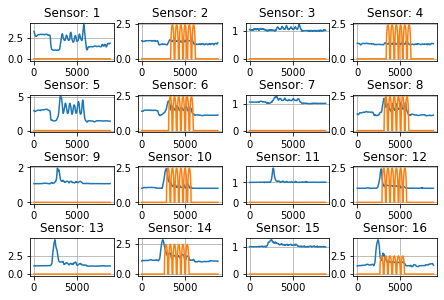

In [27]:
stackPlot(pointmap, 3)